In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
NO_OF_CPU=24
NO_OF_LAYER=11

In [4]:
layers_ex=np.genfromtxt('./profile_data/single_layer_profile_pilotnet_for_percentage.csv', delimiter=',', skip_header=0)

In [15]:

def make_pecentages(data,fl,out_file_name):
    ave_communication=[[0]*NO_OF_CPU]*NO_OF_CPU
    for i in range(NO_OF_CPU):
        
        for j in range(NO_OF_CPU):
            ave_communication[i][j]=min(layers_ex[fl])+min(layers_ex[fl+1])
            # ave_communication[i][j]=layers_ex[3][i]+layers_ex[4][j]
        
    for k in range(NO_OF_CPU):
        for jk in range(NO_OF_CPU):
            data[k][jk]=((data[k][jk]-ave_communication[k][jk])/data[k][jk])*100
        # print(data[k])
    # import numpy as np

    def save_2d_list_to_csv(data, file_name):

        with open(file_name, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerows(data)

        print(f'CSV file "{file_name}" has been created.')
        
    pth=f'./vgg_profiling_percentage/{out_file_name}.csv'
    save_2d_list_to_csv(data, pth)


    def make_heatmap(readings,name):
        plt.imshow(readings, cmap='viridis', interpolation='nearest')    
        path='./'+name+'.png'
        plt.colorbar()
        plt.title(name)
        plt.savefig(path)
        plt.show()
        
    pths=f'./vgg_profiling_percentage/{out_file_name}'
    make_heatmap(data,pths)

In [16]:
conv2conv = np.genfromtxt('./profile_conn_data_vgg/conv2conv.csv', delimiter=',', skip_header=1)
norm2conv=np.genfromtxt('./profile_conn_data_vgg/norm2conv.csv', delimiter=',', skip_header=1)
conv2flatten=np.genfromtxt('./profile_conn_data_vgg/conv2flatten.csv', delimiter=',', skip_header=1)
flatten2fc=np.genfromtxt('./profile_conn_data_vgg/flatten2fc.csv', delimiter=',', skip_header=1)
fc2fc = np.genfromtxt('./profile_conn_data_vgg/fc2fc.csv', delimiter=',', skip_header=1)

CSV file "./norm2conv.csv" has been created.


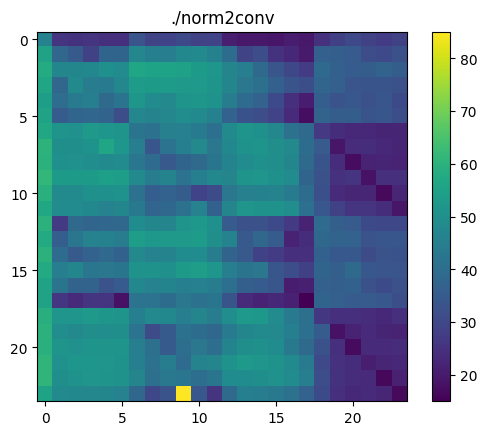

CSV file "./conv2conv.csv" has been created.


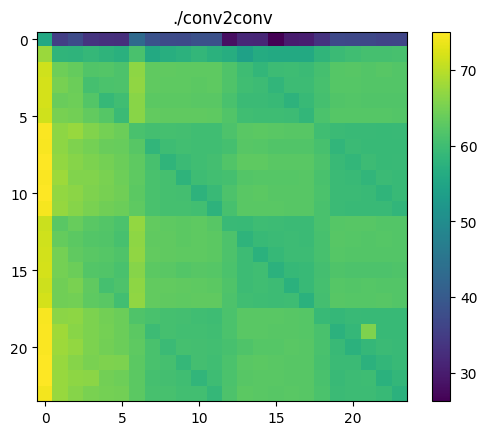

CSV file "./conv2flatten.csv" has been created.


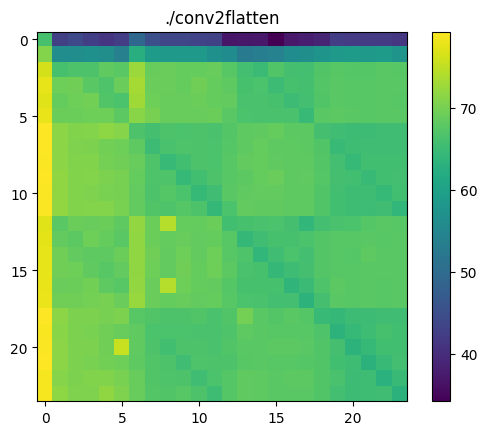

CSV file "./flat2fc.csv" has been created.


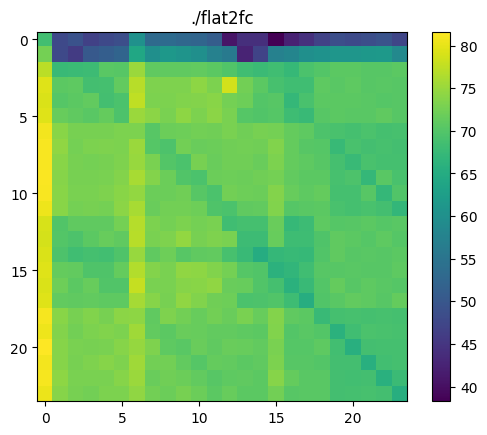

CSV file "./fc2fc.csv" has been created.


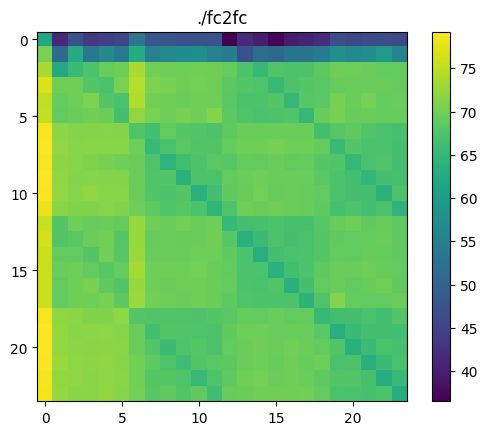

In [17]:
make_pecentages(norm2conv,0,'norm2conv')
make_pecentages(conv2conv,2,'conv2conv')
make_pecentages(conv2flatten,5,'conv2flatten')
make_pecentages(flatten2fc,6,'flat2fc')
make_pecentages(fc2fc,7,'fc2fc')